In [3]:
import numpy as np
import pandas as pd
from confusion_matrix_helper import make_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [4]:
data = pd.read_csv("parkinsons.csv")
print(data.head(3))
data.shape

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.3686

(195, 24)

In [6]:
Y = data["status"]
X = data.drop(columns=["status","name"])
# X = data.drop(columns=["status","name", "Unnamed: 0"])
# X = data.drop(columns=["status", "Unnamed: 0"])
accuracies={}
precisions={}
X.columns


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [9]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
with open("pickle_files/plain/scaler.pkl","wb") as file:
    pickle.dump(scaler,file)
X_train = pd.DataFrame(scaler.transform(X_train),columns=[x for x in X_train.columns])
X_test = pd.DataFrame(scaler.transform(X_test),columns=[x for x in X_test.columns])

# Support Vector Machine

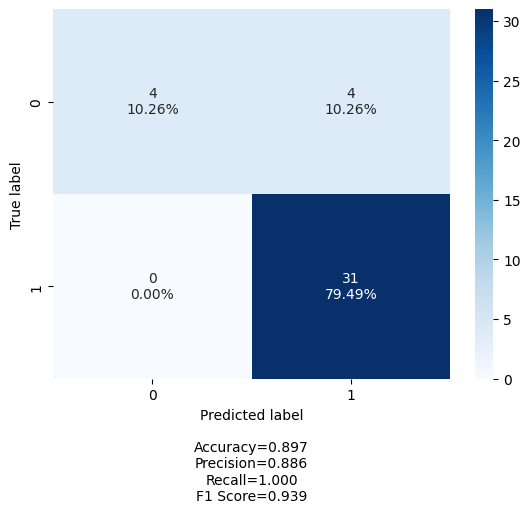

In [10]:
svc = svm.SVC()
svc.fit(X_train,Y_train)
with open("pickle_files/plain/svm.model","wb") as file:
    pickle.dump(svc,file)
Y_pred = svc.predict(X_test)
accuracies["SVM"]=accuracy_score(Y_test,Y_pred)
precisions["SVM"]=precision_score(Y_test,Y_pred)
cf = confusion_matrix(Y_test,Y_pred)
make_confusion_matrix(cf)

# Logistic Regressor

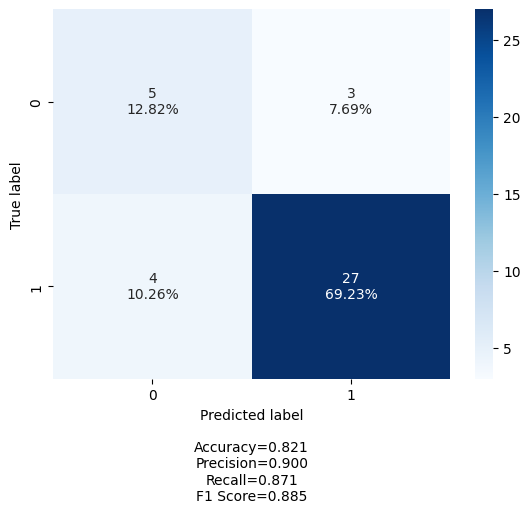

In [11]:
lrc = LogisticRegression(random_state=0)
lrc.fit(X_train,Y_train)
with open("pickle_files/plain/lrc.model","wb") as file:
    pickle.dump(lrc,file)
Y_pred = lrc.predict(X_test)
accuracies["LRC"]=accuracy_score(Y_test,Y_pred)
precisions["LRC"]=precision_score(Y_test,Y_pred)
cf = confusion_matrix(Y_test,Y_pred)
make_confusion_matrix(cf)

# Random Forest

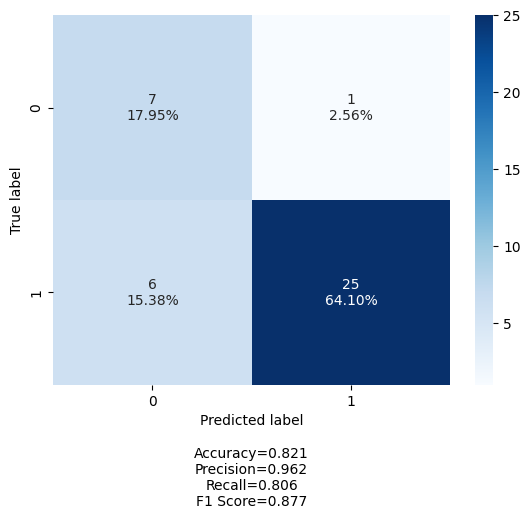

In [12]:
rfc = RandomForestClassifier(n_estimators= 10, criterion="log_loss")
rfc.fit(X_train,Y_train)
with open("pickle_files/plain/rfc.model","wb") as file:
    pickle.dump(rfc,file)
Y_pred = rfc.predict(X_test)
accuracies["RFC"]=accuracy_score(Y_test,Y_pred)
precisions["RFC"]=precision_score(Y_test,Y_pred)
cf = confusion_matrix(Y_test,Y_pred)
make_confusion_matrix(cf)

# Decision Trees

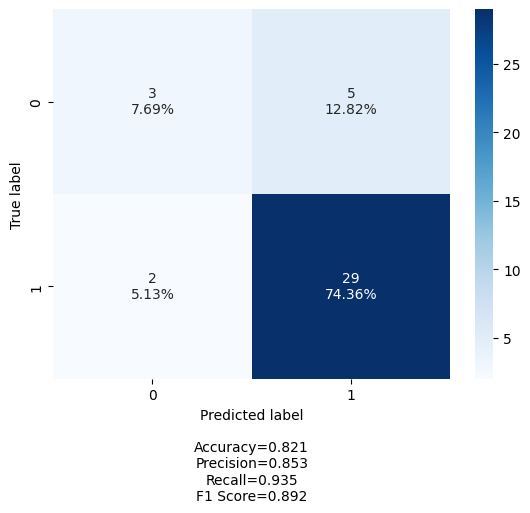

In [13]:
dtc = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
dtc.fit(X_train, Y_train)
with open("pickle_files/plain/dtc.model","wb") as file:
    pickle.dump(dtc,file)
Y_pred = dtc.predict(X_test)
accuracies["DTC"]=accuracy_score(Y_test,Y_pred)
precisions["DTC"]=precision_score(Y_test,Y_pred)
cf = confusion_matrix(Y_test,Y_pred)
make_confusion_matrix(cf)

# Metrics

In [90]:
accuracies,precisions

({'SVM': 0.7948717948717948,
  'LRC': 0.7948717948717948,
  'RFC': 0.7692307692307693,
  'DTC': 0.7692307692307693},
 {'SVM': 0.8484848484848485,
  'LRC': 0.8709677419354839,
  'RFC': 0.8666666666666667,
  'DTC': 0.84375})